<a href="https://colab.research.google.com/github/manvichaturvedi/Diving-Deep-Into-Python-Librairies/blob/main/EDA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

EDA is the process of visualizing and transforming the data into a form from which it can be used for building the machine learning model .
EDA Involves Various steps like :

*   Data Gathering
*   Data Cleaning
*   Feature Scaling

1.   Satndardization
2.   Normalization


*   Feature Transformation
*   Outlier Treatment
*   Handle Invalid Values




# Handling Missing or null Values


*   Delete Rows and Columns
*   Replacing with Mean, Median and Mode
*   Algorrithm Imputation
*   Predicting the missing values





In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#checking for null values
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0




*   As we can see that the cabin column has 687 null values that is greater then 75%. so we should drop that column
*   But Age and Embarked has lesser number of missing values.Therefore they can be treated with some technique



# Deleting the column with maximum missing data
one method is to drop the rows and columns having null values using data.dropna(axis = 0 or 1)

In [ ]:
new_data = data.drop('Cabin',axis = 1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# filling null values in age column with mean of the age data
up_new_data = new_data
up_new_data['Age'] = up_new_data['Age'].fillna(new_data['Age'].mean())
up_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
up_new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
up_new_data1 = up_new_data.dropna(axis = 0)
up_new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Feature Scaling

In [ ]:
up_new_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Unnecessary columns can be deleted
Therefor columns such as Name , PassengerId can be removed

In [ ]:
up_new_data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Normalization
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.It is also known as Min and Max Scaling.

# Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation.This means that the mean of the attribute becomes zero and the resultant distribution has the unit standard deviation.

In [ ]:
# lets take an example to implement normalization and standardization
import pandas as pd
df = pd.DataFrame(up_new_data1, columns=['Age', 'Fare'])

In [ ]:
df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df)
print(normalized_df)

[[0.27117366 0.01415106]
 [0.4722292  0.13913574]
 [0.32143755 0.01546857]
 ...
 [0.36792055 0.04577135]
 [0.32143755 0.0585561 ]
 [0.39683338 0.01512699]]


In [ ]:
scaler = StandardScaler()
standardized_df = scaler.fit_transform(df)
print(standardized_df)

[[-0.59049493 -0.50023975]
 [ 0.64397101  0.78894661]
 [-0.28187844 -0.48664993]
 ...
 [ 0.00352373 -0.17408416]
 [-0.28187844 -0.0422126 ]
 [ 0.18104628 -0.49017322]]


# Outlier Detection



*   Visualization
*   Skewness
*   Interquartile range
*   Standard Deviation



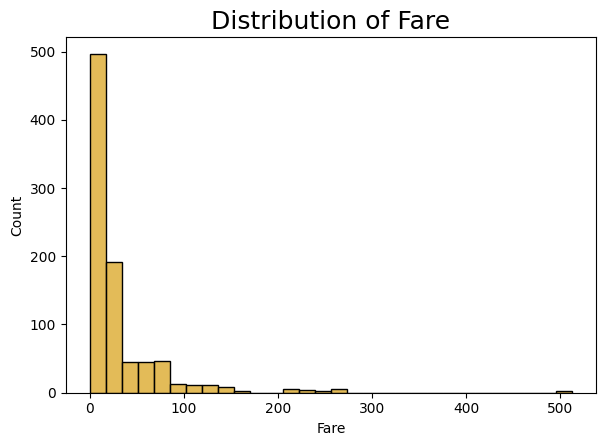

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data = up_new_data1, x = 'Fare', color = "goldenrod",bins=30)
sns.set_context("talk")
plt.title("Distribution of Fare")
plt.tight_layout()
sns.set_theme(style = "whitegrid")
plt.show()

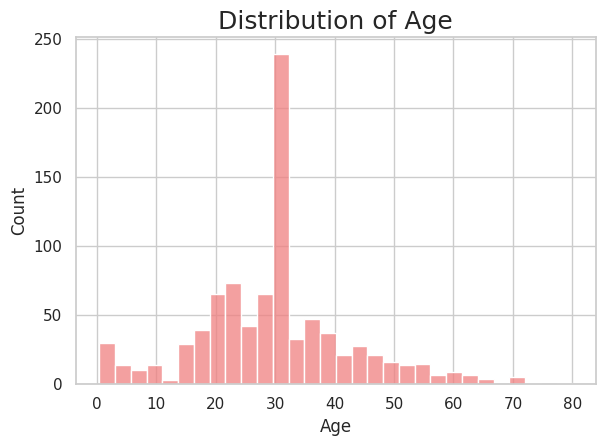

In [ ]:
sns.histplot(data = up_new_data1, x = 'Age', color = "lightcoral",bins=30)
sns.set_context("talk")
plt.title("Distribution of Age")
plt.tight_layout()
sns.set_theme(style = "whitegrid")
plt.show()

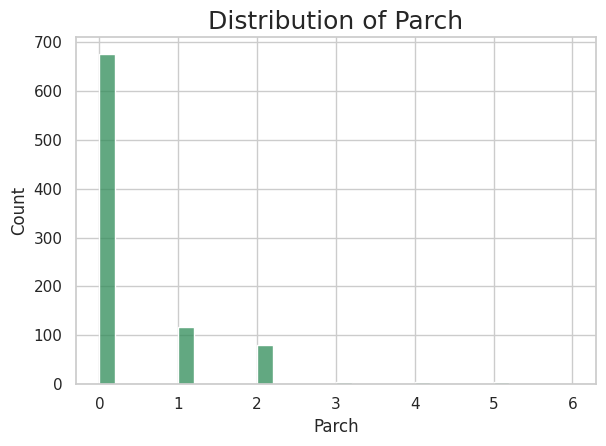

In [ ]:
sns.histplot(data = up_new_data1, x = 'Parch', color = "seagreen",bins=30)
sns.set_context("talk")
plt.title("Distribution of Parch")
plt.tight_layout()
sns.set_theme(style = "whitegrid")
plt.show()

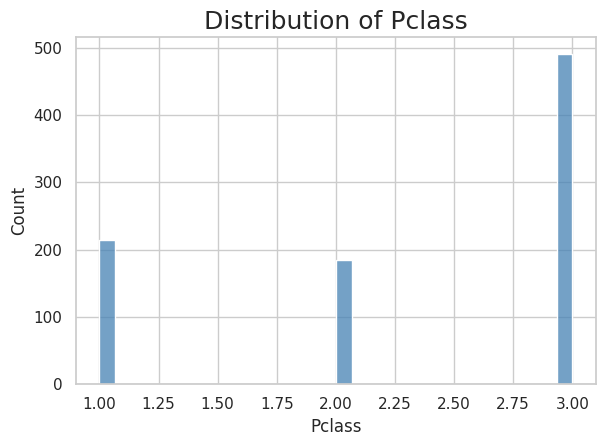

In [ ]:
sns.histplot(data = up_new_data1, x = 'Pclass', color = "steelblue",bins=30)
sns.set_context("talk")
plt.title("Distribution of Pclass")
plt.tight_layout()
sns.set_theme(style = "whitegrid")
plt.show()

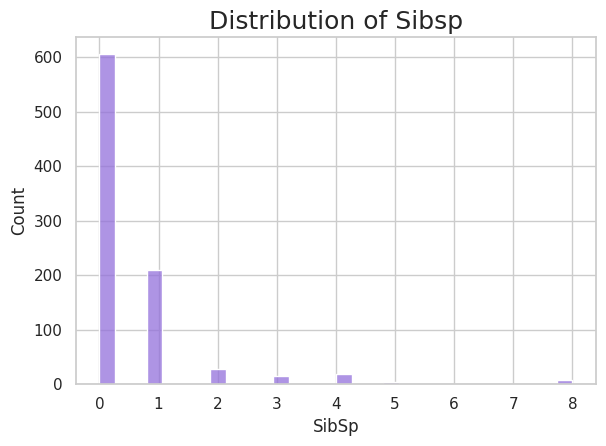

In [ ]:
sns.histplot(data = up_new_data1, x = 'SibSp', color = "mediumpurple",bins=30)
sns.set_context("talk")
plt.title("Distribution of Sibsp")
plt.tight_layout()
sns.set_theme(style = "whitegrid")
plt.show()

From the above observation we can infer that The  histograms of Parch, Fare, Sibsp are left skewed which shows the presence of outliers

In [ ]:
import statistics
def anomalies_detection(data):
  anomalies = []
  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  # 3-standard deviation
  anomaly_cut_off = random_data_std*3
  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off

  for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)
  return anomalies

In [ ]:
list_1 = anomalies_detection(up_new_data1['Fare'])
list_2 = anomalies_detection(up_new_data1['SibSp'])
list_3 = anomalies_detection(up_new_data1['Age'])
list_4 = anomalies_detection(up_new_data1['Parch'])

In [ ]:
len(list_1)

20

In [ ]:
len(list_2)

30

In [ ]:
len(list_3)

7

In [ ]:
len(list_4)

15

In [ ]:
up_new_data1.Fare.skew()

np.float64(4.801440211044194)

In [ ]:
up_new_data1.Age.skew()

np.float64(0.43172026491227716)

In [ ]:
up_new_data1.Parch.skew()

np.float64(2.74516012611158)

In [ ]:
up_new_data1.SibSp.skew()

np.float64(3.6910576308362284)

The skewness should always lies in between 1 and -1 but for fare,Parch,Sibsp it is around 5,3 & 4 resp. which indicates the presemce of outlier.

<Axes: xlabel='Fare', ylabel='Density'>

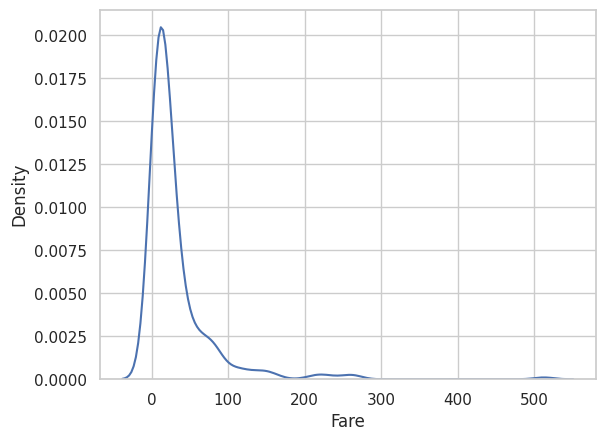

In [ ]:
import seaborn as sns
sns.kdeplot(data = up_new_data1.Fare)

In [ ]:
import numpy as np
#up_new_data1['Fare_transformed'] = np.log(up_new_data1.Fare)

#BoxPlots

<Axes: ylabel='Age'>

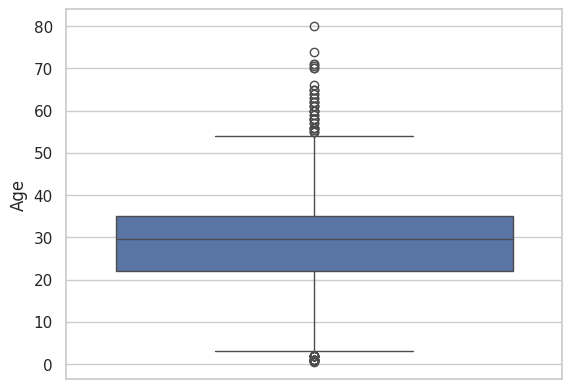

In [ ]:
sns.boxplot(data = up_new_data1['Age'])

<Axes: ylabel='Fare'>

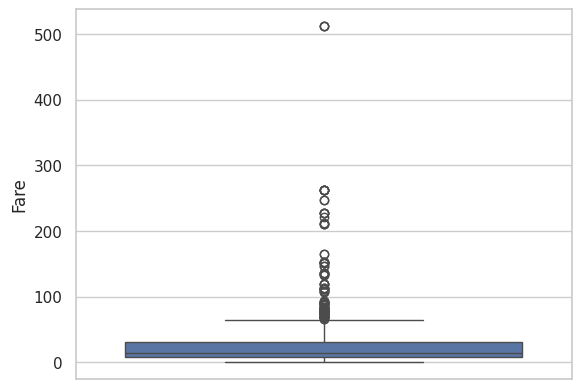

In [ ]:
sns.boxplot(data = up_new_data1['Fare'])

<Axes: ylabel='Parch'>

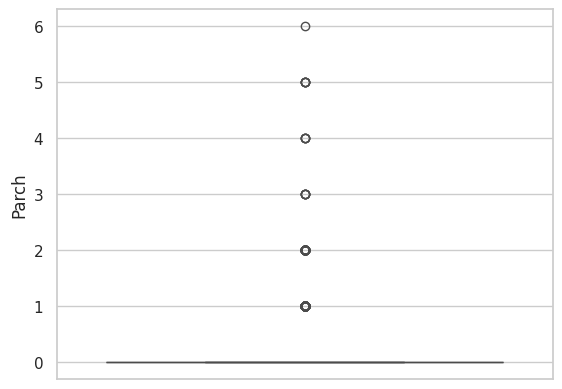

In [ ]:
sns.boxplot(data = up_new_data1['Parch'])

<Axes: ylabel='SibSp'>

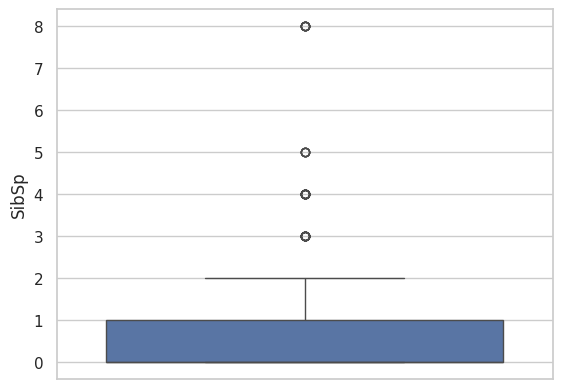

In [ ]:
sns.boxplot(data = up_new_data1['SibSp'])

# **Outlier** ***Treatment***
Flooring And Capping
in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

In [ ]:
Q1 = up_new_data1['Fare'].quantile(0.25)
Q3 = up_new_data1['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
up_new_data1['Fare']=np.where(up_new_data1['Fare']>upper_whisker,upper_whisker,np.where(up_new_data1['Fare']<lower_whisker,lower_whisker,up_new_data1['Fare']))

/tmp/ipython-input-834306870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_new_data1['Fare']=np.where(up_new_data1['Fare']>upper_whisker,upper_whisker,np.where(up_new_data1['Fare']<lower_whisker,lower_whisker,up_new_data1['Fare']))


In [ ]:
print('skewness value of Fare: ',up_new_data1['Fare'].skew())

skewness value of Fare:  1.091278548539164


In [ ]:
Q1 = up_new_data1['Parch'].quantile(0.25)
Q3 = up_new_data1['Parch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
up_new_data1['Parch']=np.where(up_new_data1['Parch']>upper_whisker,upper_whisker,np.where(up_new_data1['Parch']<lower_whisker,lower_whisker,up_new_data1['Parch']))

/tmp/ipython-input-650692598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_new_data1['Parch']=np.where(up_new_data1['Parch']>upper_whisker,upper_whisker,np.where(up_new_data1['Parch']<lower_whisker,lower_whisker,up_new_data1['Parch']))


In [ ]:
print('skewness value of Parch: ',up_new_data1['Parch'].skew())

skewness value of Parch:  0.0


In [ ]:
Q1 = up_new_data1['SibSp'].quantile(0.25)
Q3 = up_new_data1['SibSp'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
up_new_data1['SibSp']=np.where(up_new_data1['SibSp']>upper_whisker,upper_whisker,np.where(up_new_data1['SibSp']<lower_whisker,lower_whisker,up_new_data1['SibSp']))

/tmp/ipython-input-4038001999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_new_data1['SibSp']=np.where(up_new_data1['SibSp']>upper_whisker,upper_whisker,np.where(up_new_data1['SibSp']<lower_whisker,lower_whisker,up_new_data1['SibSp']))


In [ ]:
print('skewness value of SibSp: ',up_new_data1['Parch'].skew())

skewness value of SibSp:  0.0


<Axes: ylabel='Fare'>

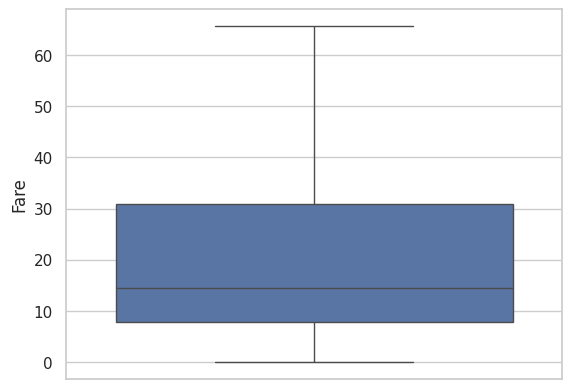

In [ ]:
sns.boxplot(data = up_new_data1['Fare'])

Hence All Values are Outlier Free Now

# Type of Analysis


*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis



# Data Visualization

/tmp/ipython-input-2093348823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = up_new_data1, x = "Sex" , y = "Survived", palette = ['pink', 'lightblue']


<Axes: xlabel='Sex', ylabel='Survived'>

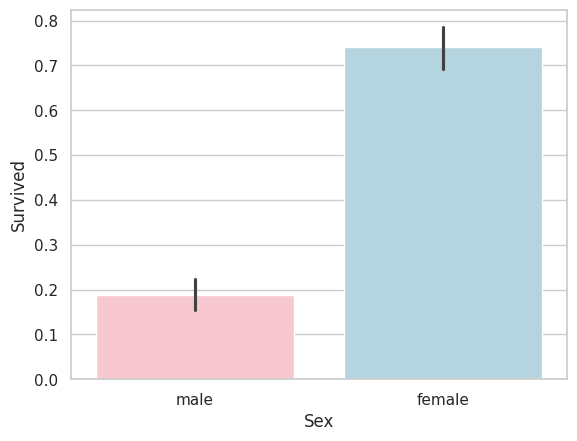

In [ ]:
sns.set_style('whitegrid')
sns.barplot(data = up_new_data1, x = "Sex" , y = "Survived", palette = ['pink', 'lightblue']
            )


<Axes: xlabel='Sex', ylabel='Fare'>

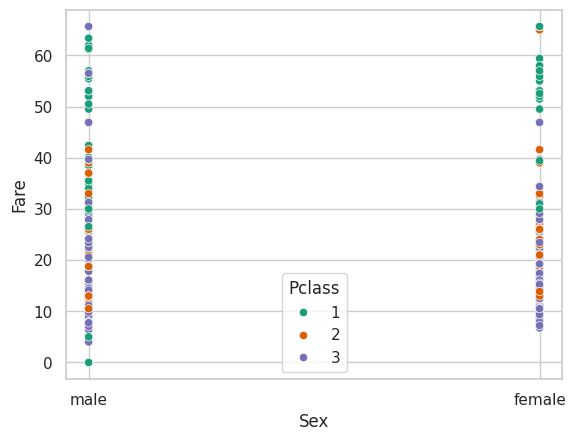

In [ ]:
sns.scatterplot(x="Sex", y = 'Fare' ,hue ='Pclass' ,palette = "Dark2", data = up_new_data1)


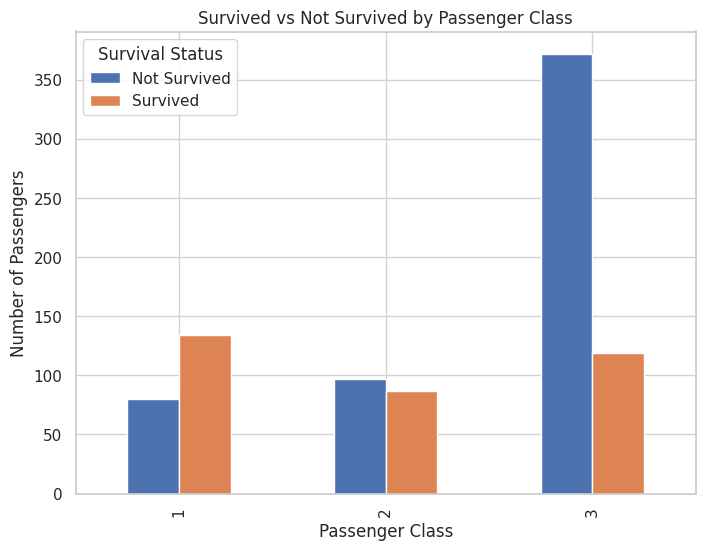

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Pclass' and 'Survived' and count
grouped = up_new_data1.groupby(['Pclass', 'Survived']).size().unstack()

# Plot
grouped.plot(kind='bar', figsize=(8,6))
plt.title('Survived vs Not Survived by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.grid(color='lightgray')
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()


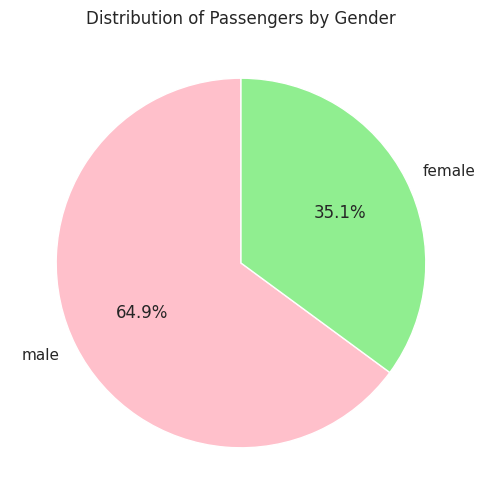

In [ ]:
# Count of each gender
gender_counts = up_new_data1['Sex'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors = ['pink','lightgreen'], startangle=90)
plt.title('Distribution of Passengers by Gender')
plt.show()


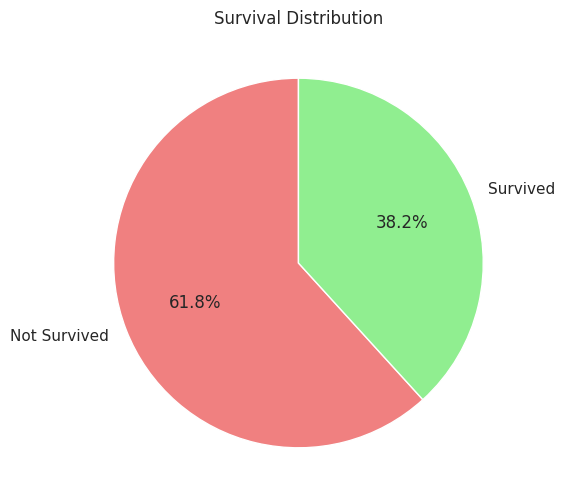

In [ ]:
# Convert 0/1 to labels
survival_counts = up_new_data1['Survived'].value_counts()
survival_labels = ['Not Survived', 'Survived']

plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=survival_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival Distribution')
plt.show()


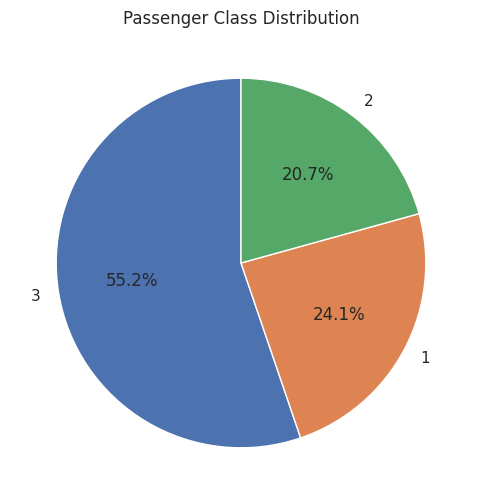

In [ ]:
class_counts = up_new_data1['Pclass'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Passenger Class Distribution')
plt.show()


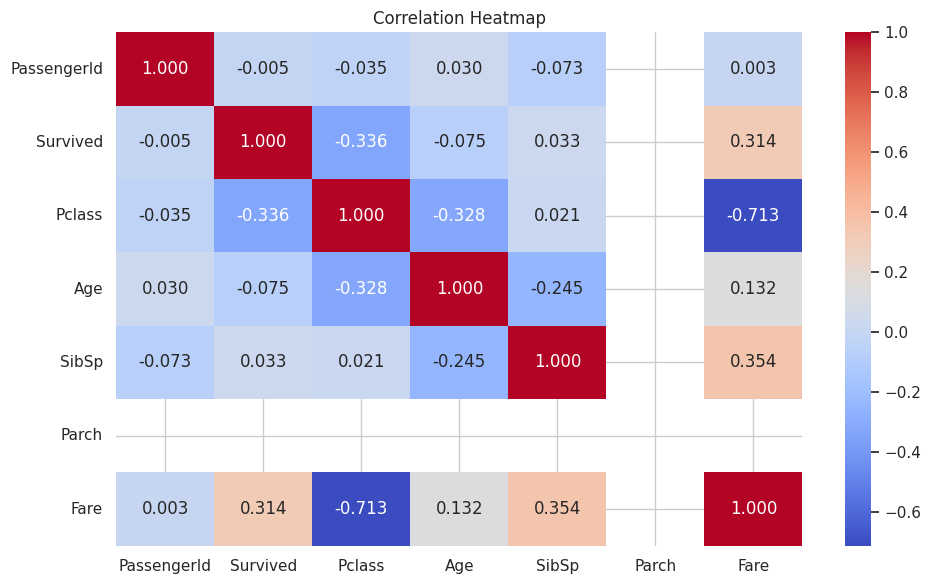

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(up_new_data1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".3f")

plt.title("Correlation Heatmap")

plt.tight_layout()  # ✅ This prevents cutoff issues
plt.show()


In [ ]:
up_new_data1.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.072990,NaN,0.003266
Survived,-0.005028,1.000000,-0.335549,-0.074673,0.033225,NaN,0.313658
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.021124,NaN,-0.713413
Age,0.030300,-0.074673,-0.327954,1.000000,-0.245198,NaN,0.131713
SibSp,-0.072990,0.033225,0.021124,-0.245198,1.000000,NaN,0.354126
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.003266,0.313658,-0.713413,0.131713,0.354126,NaN,1.000000


# Removing Unnecessary column
*   passenger Id
*   Name


*   Ticket

In [ ]:
up_new_data1.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

/tmp/ipython-input-3941256757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_new_data1.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)


In [ ]:
up_new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.5+ KB


# Feature Encoding
*   Since, the columns sex and Embarked are  categorical in nature.
*   So to canvert them into machine understandable form we use Feature Encoding.


*   Binary Encoding for sex i.e we will assign 0 for male and 1 for female.


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#encoding column embarked
le.fit(up_new_data1['Embarked'])

le = LabelEncoder()

columns = ['Embarked']

for col in columns:
    le.fit(up_new_data1[col])
    up_new_data1[col] = le.transform(up_new_data1[col])

/tmp/ipython-input-3102118016.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_new_data1[col] = le.transform(up_new_data1[col])


In [ ]:
up_new_data1['Sex'] = up_new_data1['Sex'].apply(
    lambda x: 1 if x == 'female' else (0 if x == 'male' else None))

/tmp/ipython-input-611201923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_new_data1['Sex'] = up_new_data1['Sex'].apply(


In [ ]:
up_new_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1.0,0.0,7.2500,2
1,1,1,1,38.0,1.0,0.0,65.6563,0
2,1,3,1,26.0,0.0,0.0,7.9250,2
3,1,1,1,35.0,1.0,0.0,53.1000,2
4,0,3,0,35.0,0.0,0.0,8.0500,2
